<a href="https://colab.research.google.com/github/sundusm1/Android-Lemonade/blob/main/Electric_Power_Consumption(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

import math
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

# For Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
! unzip /content/household_power_consumption.zip

--2024-04-19 06:30:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘household_power_consumption.zip’

household_power_con     [ <=>                ]  19.68M  98.2KB/s    in 3m 5s   

2024-04-19 06:33:30 (109 KB/s) - ‘household_power_consumption.zip’ saved [20640916]

Archive:  /content/household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [ ]:
#! unzip /content/drive/MyDrive/sundus/household_power_consumption.zip

Archive:  /content/drive/MyDrive/sundus/household_power_consumption.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
power = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                 parse_dates={'Date_Time' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='Date_Time')

In [ ]:
power.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
power.sample(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2009-09-26 22:18:00,0.404,0.252,245.66,1.8,0.0,1.0,1.0
2009-07-22 09:53:00,0.250,0.138,243.18,1.2,0.0,0.0,1.0
2009-08-09 23:43:00,0.334,0.254,237.66,1.8,0.0,1.0,1.0
2007-07-24 03:20:00,0.112,0.000,235.68,0.6,0.0,0.0,0.0
2008-08-21 05:54:00,0.156,0.118,238.34,0.8,0.0,0.0,0.0


In [ ]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
power.shape

(2075259, 7)

In [ ]:
power.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
power.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
# Deal with Missing Values
# Find All Columns Having nan:

droping_list_all=[]
for j in range(0,7):
    if not power.iloc[:, j].notnull().all():
        droping_list_all.append(j)

droping_list_all

[0, 1, 2, 3, 4, 5, 6]

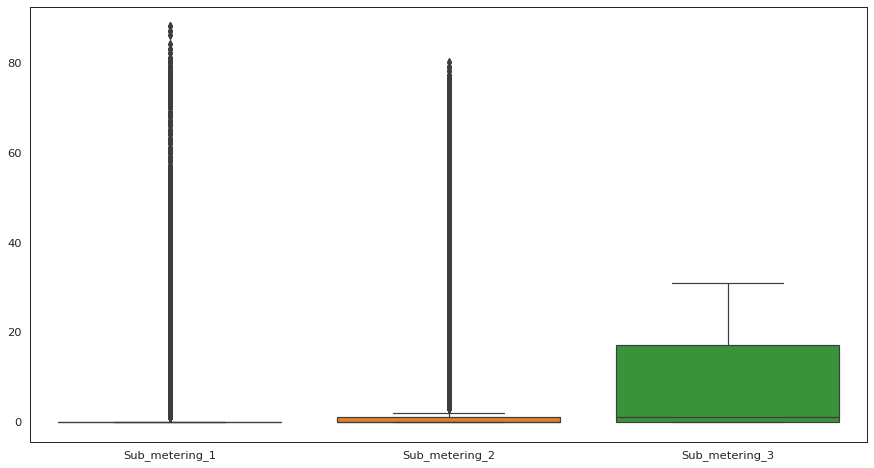

In [ ]:
#  Plotting Boxplot For Checking Median & Mean Values To Fill Null Values.
plt.figure(figsize=(15,8))
sns.boxplot(data=power.iloc[:,4:])

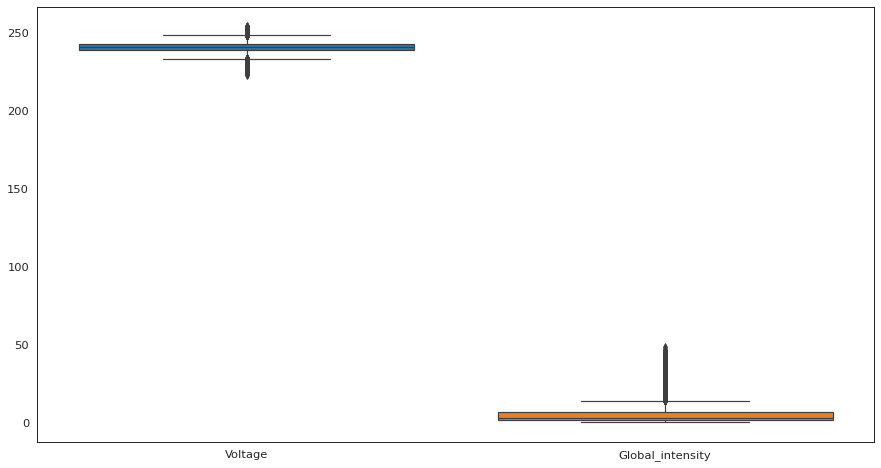

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=power.iloc[:,2:4])

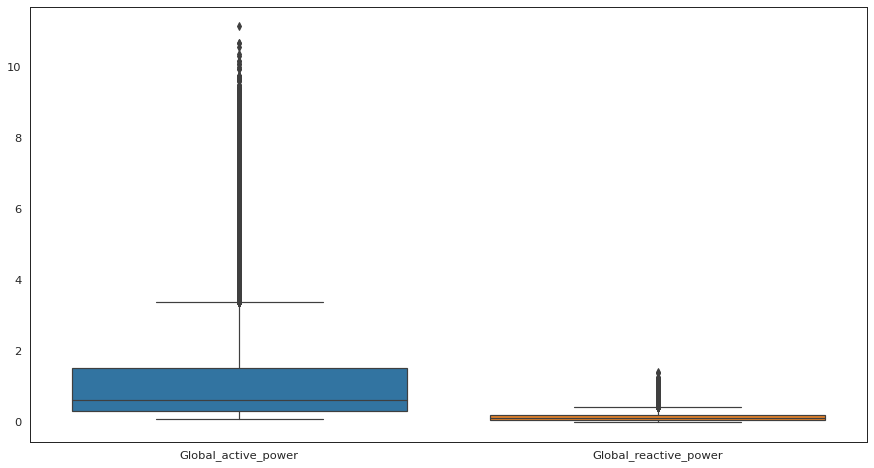

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=power.iloc[:,:2])

In [ ]:
# Fill nan With Mean All Columns

for j in range(0,7):
        power.iloc[:,j]=power.iloc[:,j].fillna(power.iloc[:,j].mean())

In [ ]:
#  Another Sanity Check To Make Sure That There Are Not More Any nan
power.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

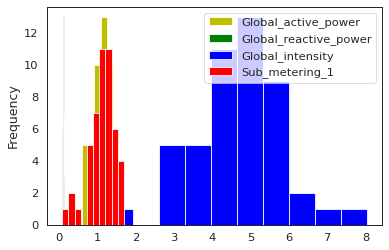

In [ ]:
#  EDA
#  Data Visualization
#  Hist Plot Of The Mean Of Different Feature Resampled Over Month
power.Global_active_power.resample('M').mean().plot(kind='hist', color='y', legend=True )
power.Global_reactive_power.resample('M').mean().plot(kind='hist',color='g', legend=True)
power.Global_intensity.resample('M').mean().plot(kind='hist', color='b', legend=True)
power.Sub_metering_1.resample('M').mean().plot(kind='hist', color='r', legend=True)
plt.show()

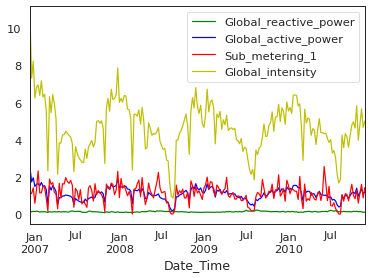

In [ ]:
#  Resampling Over Week & Computing Mean
power.Global_reactive_power.resample('W').mean().plot(color='g', legend=True)
power.Global_active_power.resample('W').mean().plot(color='b', legend=True)
power.Sub_metering_1.resample('W').mean().plot(color='r', legend=True)
power.Global_intensity.resample('W').mean().plot(color='y', legend=True)
plt.show()

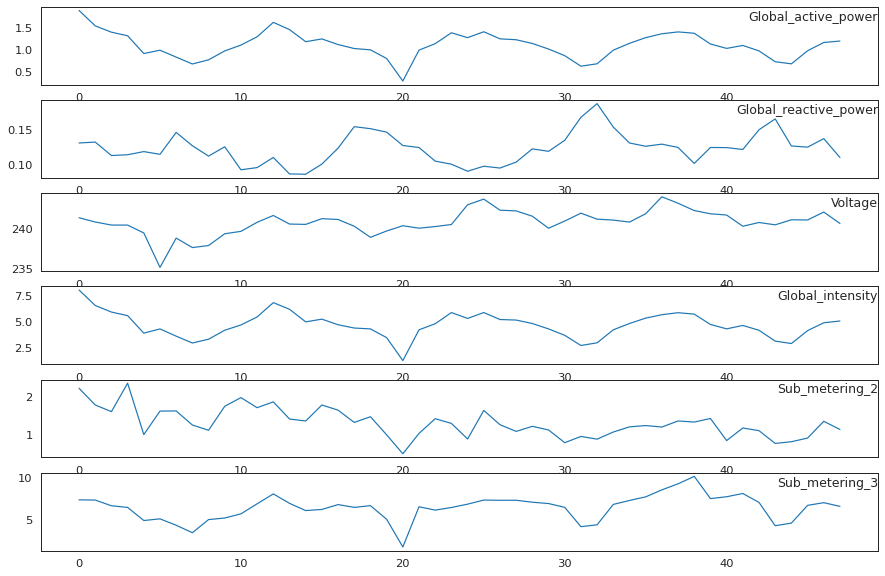

In [ ]:
#  Resampling Over Month & Computing Mean
#  Specifying Columns To Plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = power.resample('M').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1

plt.show()

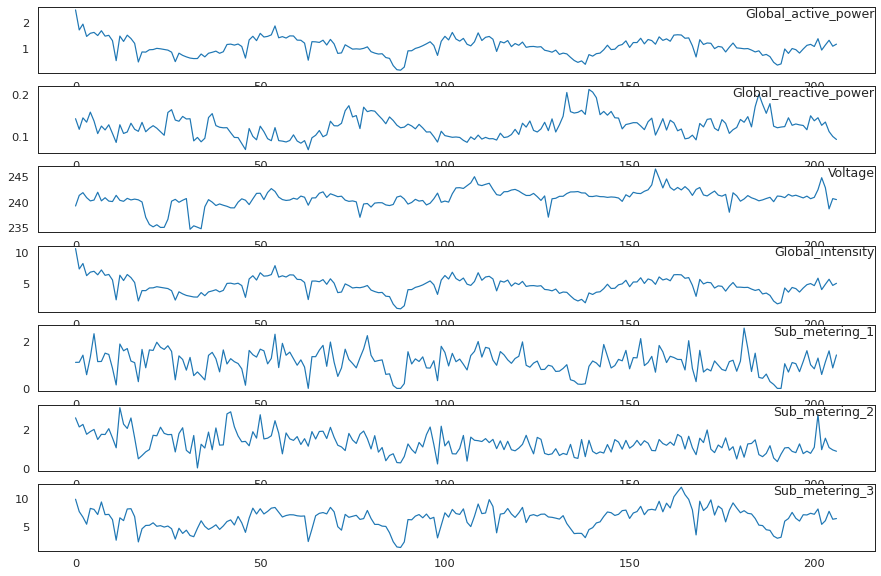

In [ ]:
#  Resampling Over Week & Computing Mean
cols = [0, 1, 2, 3,4, 5, 6]
i = 1
groups=cols
values = power.resample('W').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1

plt.show()

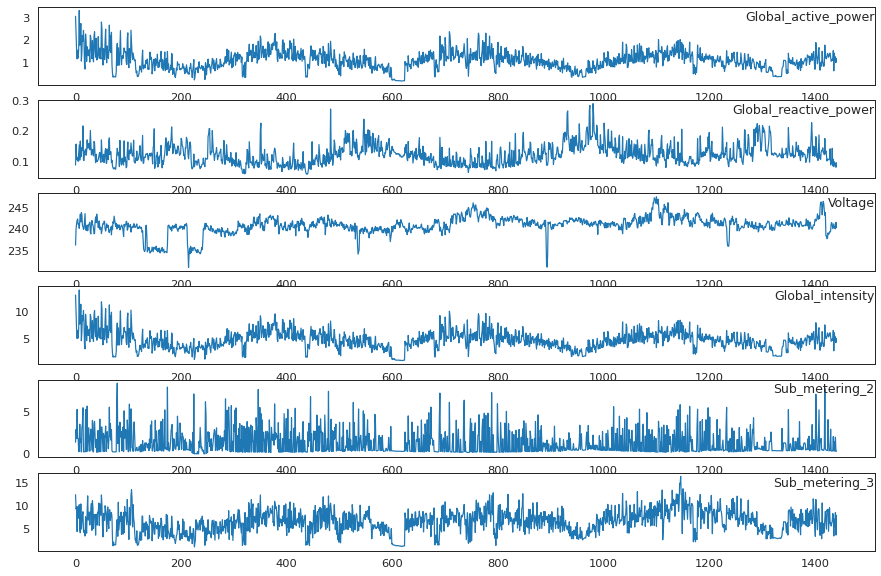

In [ ]:
#  Comparing The Mean of Different Features Resampled Over Day
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = power.resample('D').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [ ]:
week_info = power.resample('W')
week = week_info.sum()

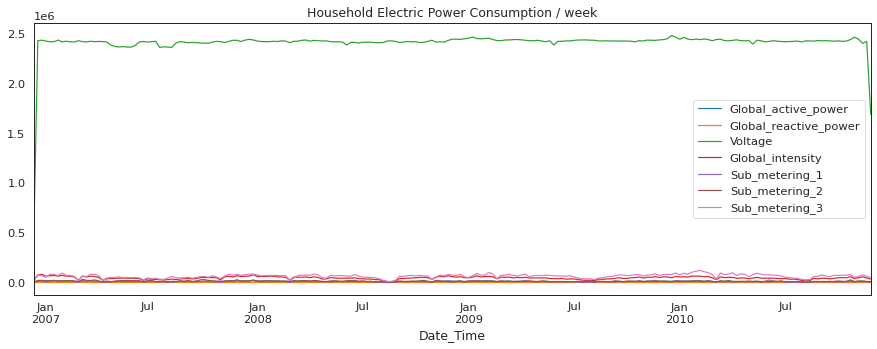

In [ ]:
x = week.plot(title='Household Electric Power Consumption / week', figsize=(15,5))

In [ ]:
daily_info = power.resample('D')
day = daily_info.sum()

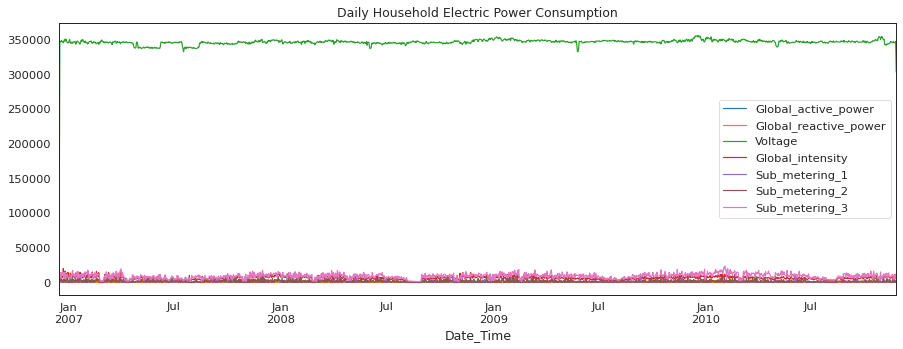

In [ ]:
y = day.plot(title='Daily Household Electric Power Consumption', figsize=(15,5))

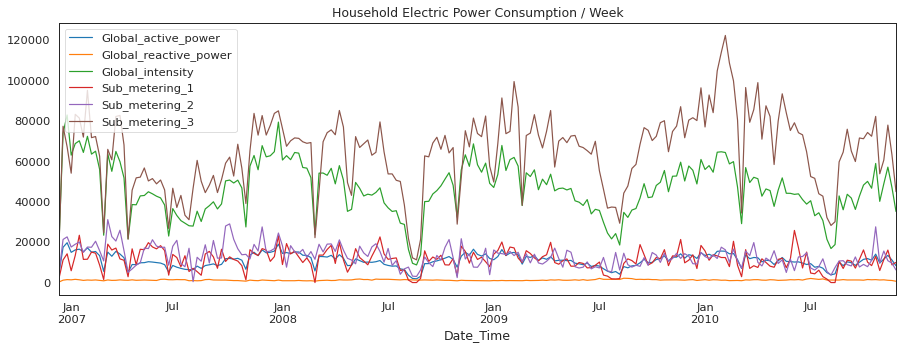

In [ ]:
week_data = week.drop(columns=['Voltage'])
a = week_data.plot(title='Household Electric Power Consumption / Week', figsize=(15,5))

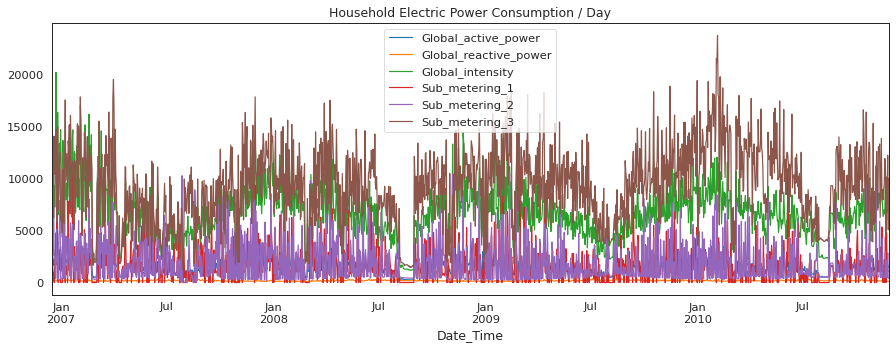

In [ ]:
daily_data = day.drop(columns=['Voltage'])
b = daily_data.plot(title='Household Electric Power Consumption / Day', figsize=(15,5))

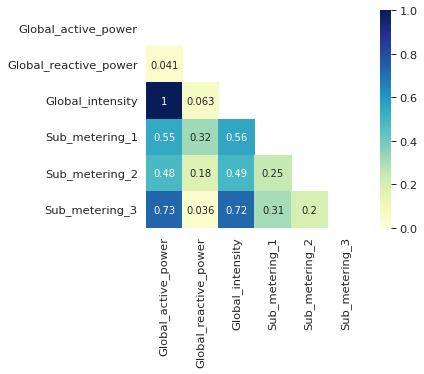

In [ ]:
p = daily_data.corr(method='pearson')
mask = np.zeros_like(p)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(p, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

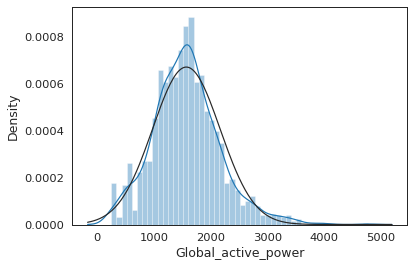

In [ ]:
z = sns.distplot(daily_data['Global_active_power'], fit=norm, bins=50, kde=True);

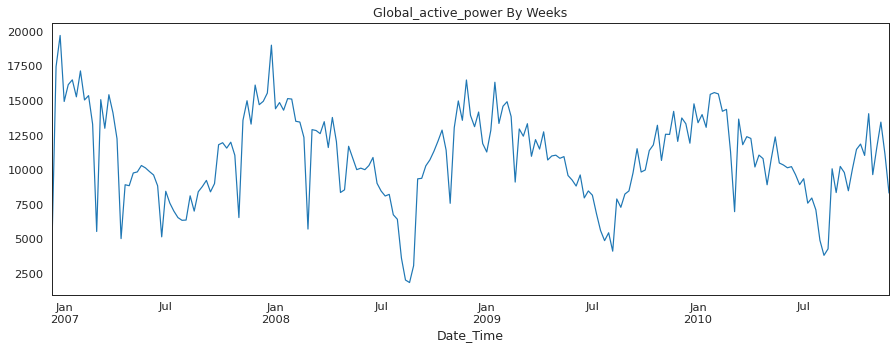

In [ ]:
c = week_data.Global_active_power.plot(title='Global_active_power By Weeks', figsize=(15,5))

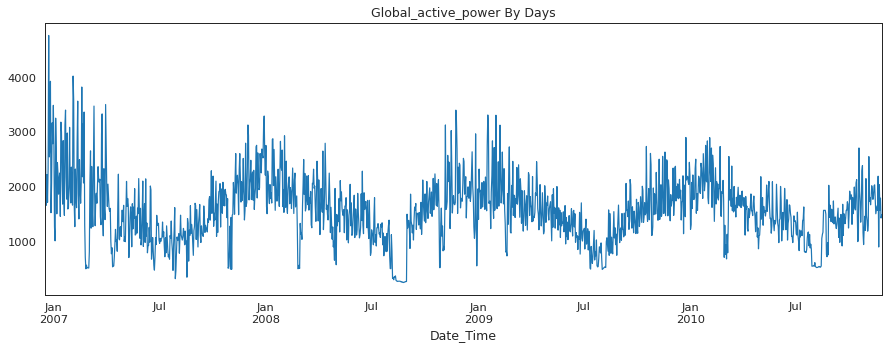

In [ ]:
d = daily_data.Global_active_power.plot(title='Global_active_power By Days', figsize=(15,5))

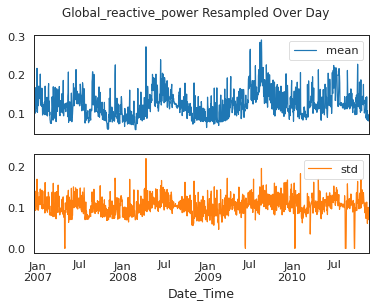

In [ ]:
#  Standard Deviation & Mean of 'Global_reactive_power' Resampled Over Day
x1 = power.Global_reactive_power.resample('D').agg(['mean', 'std'])
x1.plot(subplots = True, title='Global_reactive_power Resampled Over Day')
plt.show()

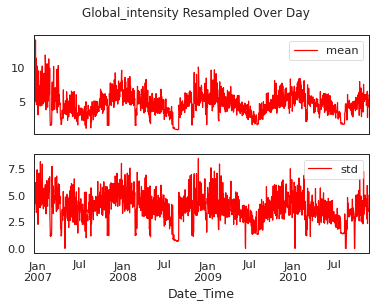

In [ ]:
#  Standard Deviation & Mean of 'Global_intensity' Resampled Over Day
x2 = power.Global_intensity.resample('D').agg(['mean', 'std'])
x2.plot(subplots = True, title='Global_intensity Resampled Over Day', color='red')
plt.show()

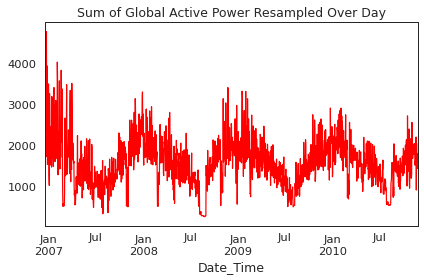

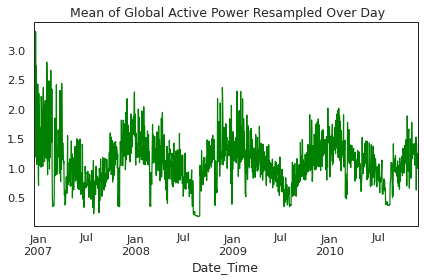

In [ ]:
#  Resampling Over Day, & Showing The Mean & Sum of Global_active_power
power.Global_active_power.resample('D').sum().plot(title='Sum of Global Active Power Resampled Over Day', color='red')
plt.tight_layout()
plt.show()

power.Global_active_power.resample('D').mean().plot(title=' Mean of Global Active Power Resampled Over Day', color='green')
plt.tight_layout()
plt.show()

In [ ]:
#  Calculating Power Consumed Per Month
#  Global_reactive_power
#  Sum of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').sum().tail()

Date_Time
2010-07-31    7387.013714
2010-08-31    5676.036806
2010-09-30    5421.554712
2010-10-31    6140.539714
2010-11-30    4128.708000
Freq: M, Name: Global_reactive_power, dtype: float64

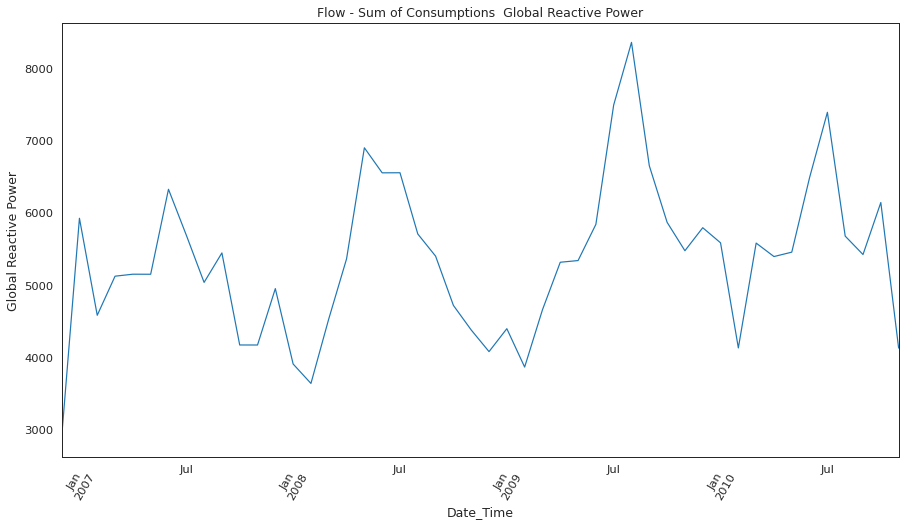

In [ ]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Sum of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Flow - Sum of Consumptions  Global Reactive Power')
plt.show()

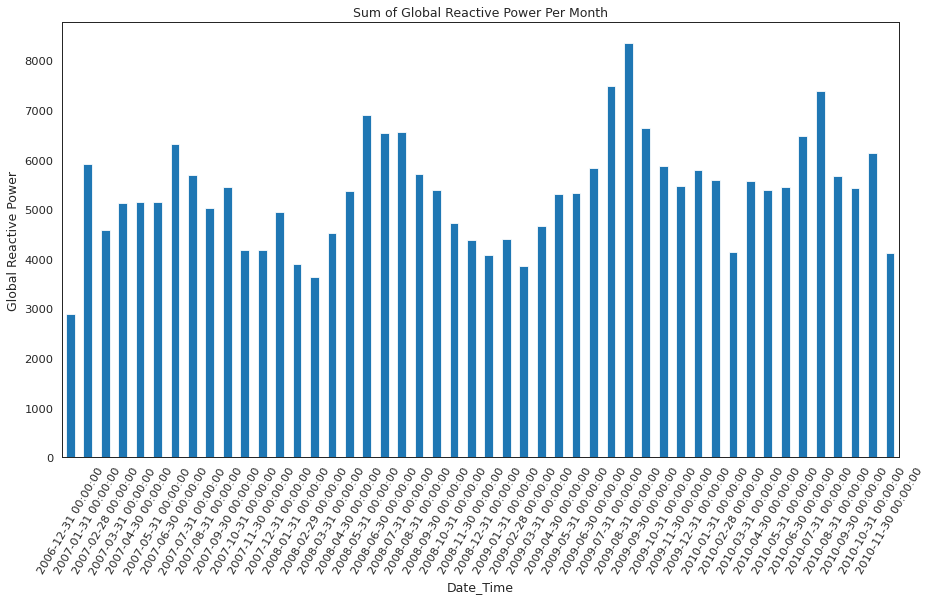

In [ ]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Sum of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Sum of Global Reactive Power Per Month')
plt.show()

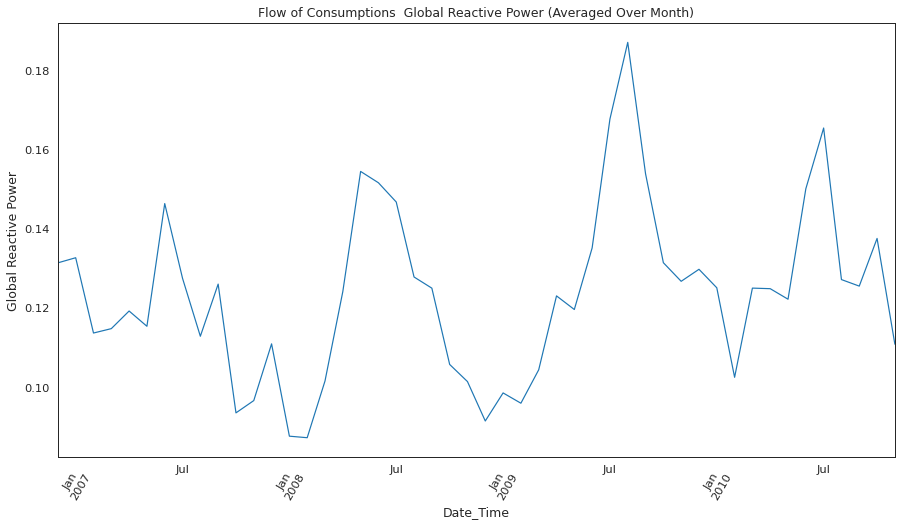

In [ ]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Mean of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Flow of Consumptions  Global Reactive Power (Averaged Over Month)')
plt.show()

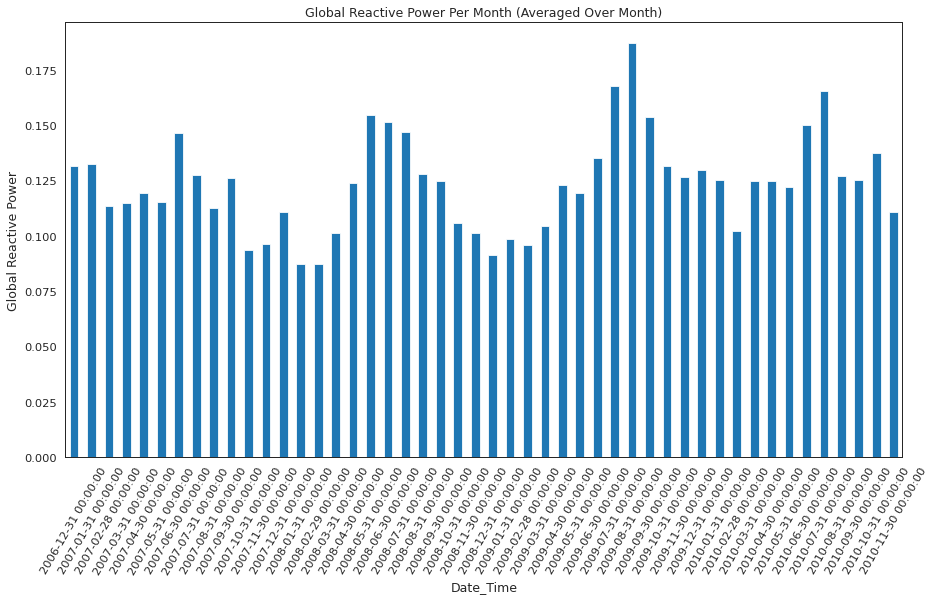

In [ ]:
plt.figure(figsize=(15,8))  #  Size of Plot
#  Mean of 'Global_reactive_power' Resampled Over Month
power['Global_reactive_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global Reactive Power')
plt.title('Global Reactive Power Per Month (Averaged Over Month)')
plt.show()

In [ ]:
#  Global_active_power
# Sum of 'Global_active_power' Resampled Over Month
power['Global_active_power'].resample('M').sum().tail()

Date_Time
2010-07-31    32188.843615
2010-08-31    29991.384254
2010-09-30    42026.211946
2010-10-31    51934.045615
2010-11-30    44598.388000
Freq: M, Name: Global_active_power, dtype: float64

In [ ]:
#  Mean of 'Global_active_power' Resampled Over Month
power['Global_active_power'].resample('M').mean().tail()

Date_Time
2010-07-31    0.721076
2010-08-31    0.671850
2010-09-30    0.972829
2010-10-31    1.163397
2010-11-30    1.196854
Freq: M, Name: Global_active_power, dtype: float64

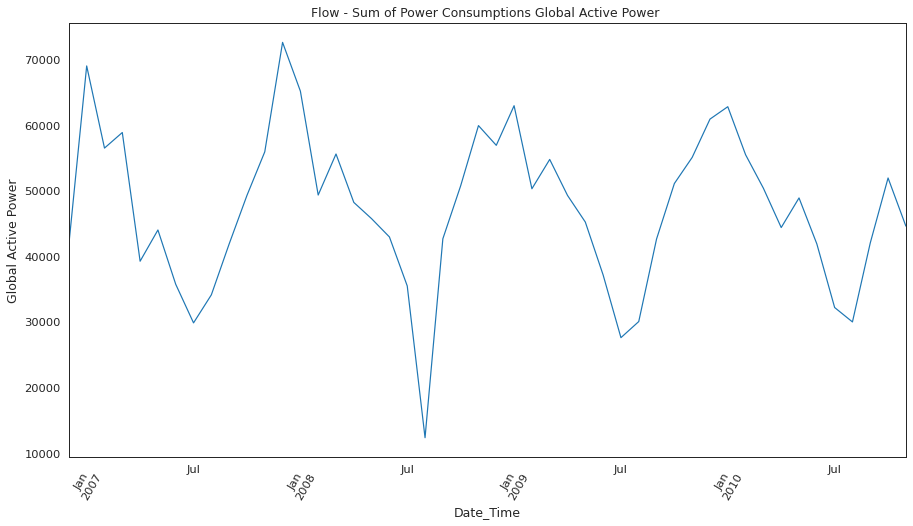

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').sum().plot(kind='line')  #  Sum of 'Global_active_power' Resampled Over Month
#  Sequence Values To Use For The xticks
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Flow - Sum of Power Consumptions Global Active Power ')
plt.show()

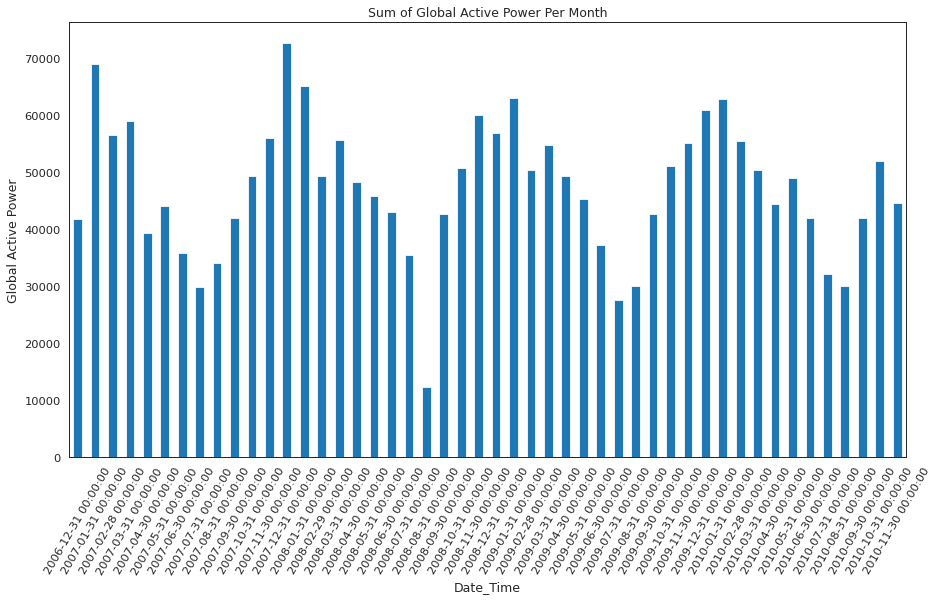

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').sum().plot(kind='bar')  #  Sum of 'Global_active_power' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Sum of Global Active Power Per Month')
plt.show()

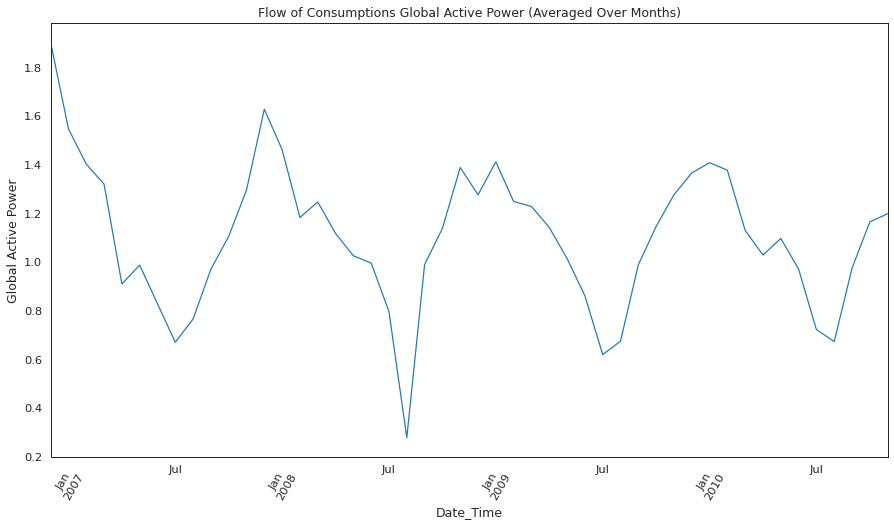

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').mean().plot(kind='line')  #  Mean of 'Global_active_power' Resampled Over Month
#  Sequence Values To Use For The xticks
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Flow of Consumptions Global Active Power (Averaged Over Months)')
plt.show()

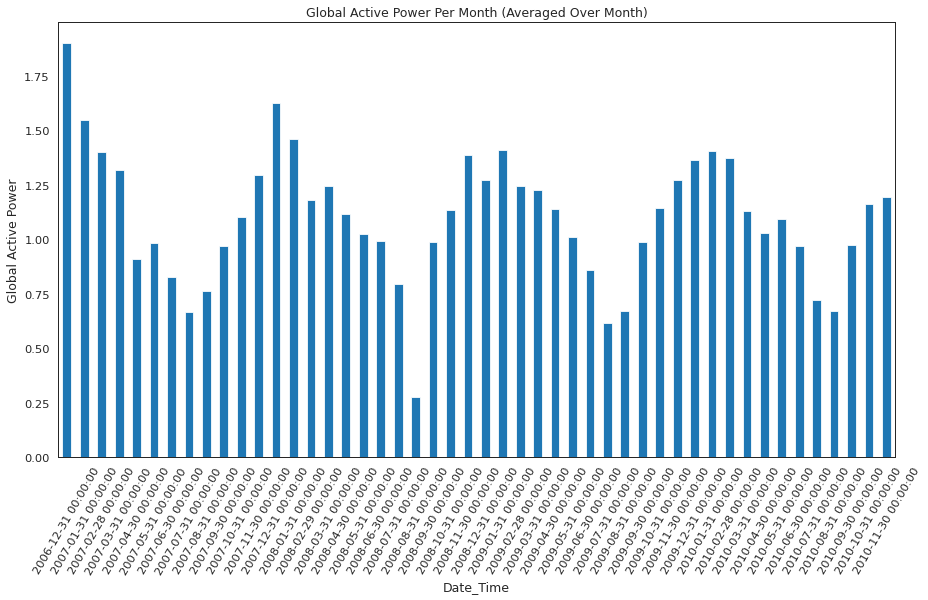

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('M').mean().plot(kind='bar')  #  Mean of 'Global_active_power' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Month (Averaged Over Month)')
plt.show()

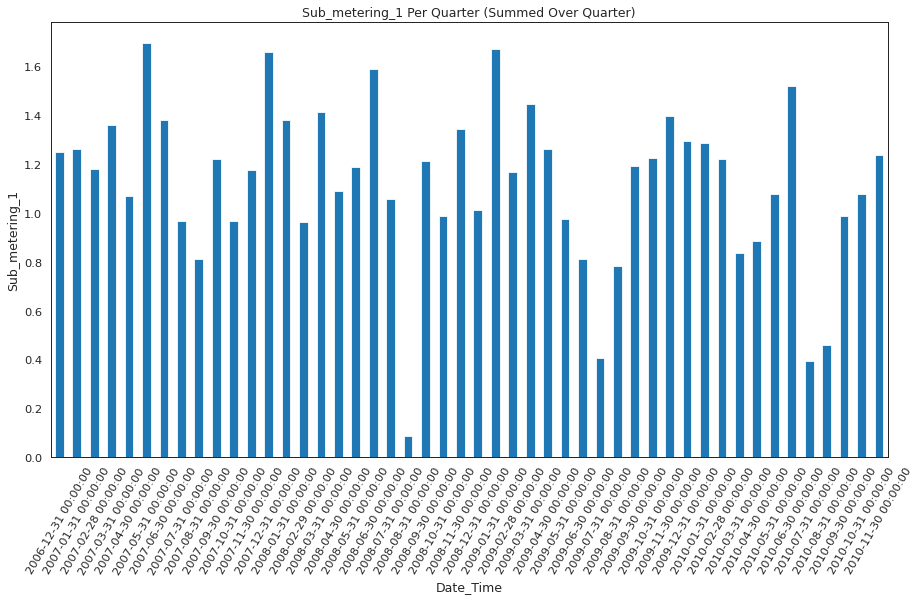

In [ ]:
plt.figure(figsize=(15,8))
power['Sub_metering_1'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 Per Quarter (Summed Over Quarter)')
plt.show()

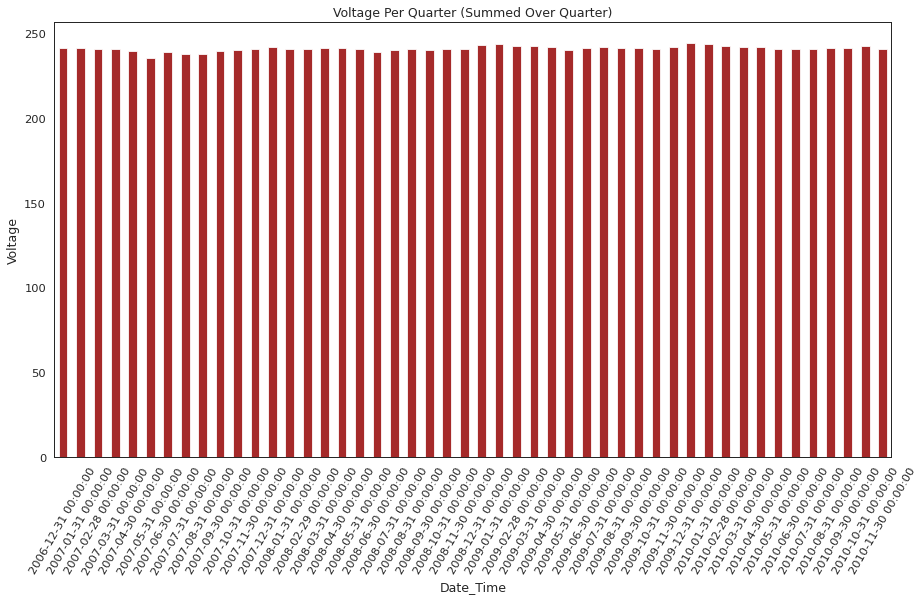

In [ ]:
plt.figure(figsize=(15,8))
power['Voltage'].resample('M').mean().plot(kind='bar', color='brown')  #  Mean of 'Voltage' Resampled Over Month
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage Per Quarter (Summed Over Quarter)')
plt.show()

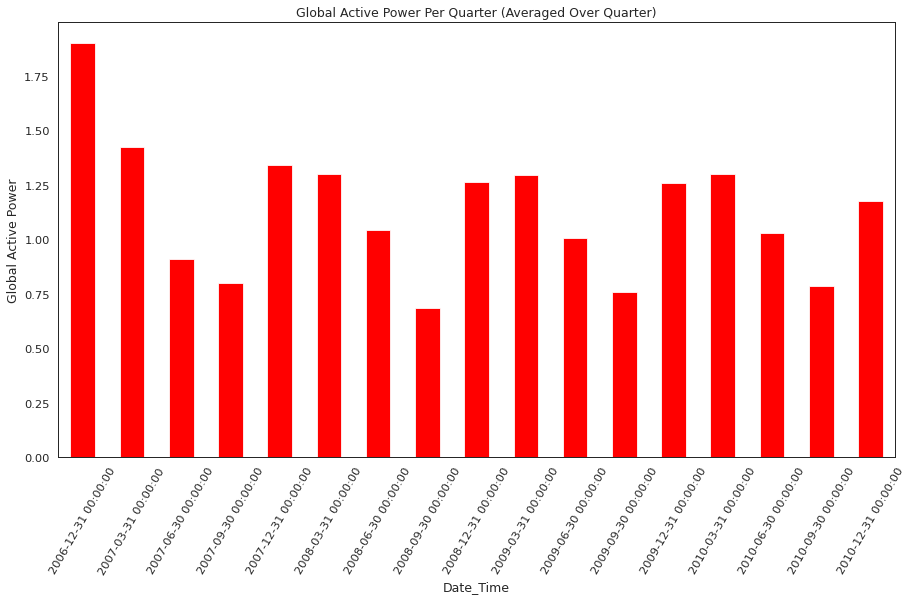

In [ ]:
plt.figure(figsize=(15,8))
power['Global_active_power'].resample('Q').mean().plot(kind='bar', color='red')  #  Mean of 'Global_active_power' Resampled Over Quarter
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.title('Global Active Power Per Quarter (Averaged Over Quarter)')
plt.show()

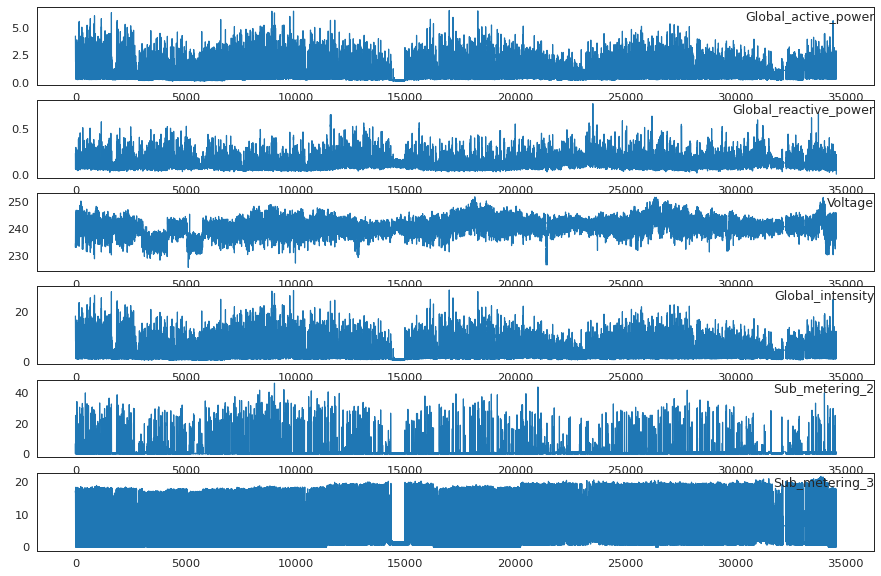

In [ ]:
#  Resampling Over Hour & Computing Mean
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = power.resample('h').mean().values
#  Plotting Each Column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(power.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

In [ ]:
#  Dropping Feature: Voltage
power.drop(['Voltage'],1,inplace=True)

In [ ]:
def data_prep(data, n_in=1, n_out=1, dropnan=True):
    names, cols = list(), list()
    data_frame = pd.DataFrame(data)
    n = 1 if type(data) is list else data.shape[1]

    for x in range(n_in, 0, -1):  #  Input Sequence (t-n, ... t-1)
        cols.append(data_frame.shift(x))
        names += [('var%d(t-%d)' % (y+1, x)) for y in range(n)]

    for x in range(0, n_out):  #  Forecast Sequence (t, t+1, ... t+n)
        cols.append(data_frame.shift(-x))
        if x == 0:
            names += [('var%d(t)' % (y+1)) for y in range(n)]
        else:
            names += [('var%d(t+%d)' % (y+1, x)) for y in range(n)]

    z = pd.concat(cols, axis=1)  #  Putting It All Together
    z.columns = names

    if dropnan:  #  Dropping Rows With NaN Values
        z.dropna(inplace=True)
    return z

## Houly Data


In [ ]:
#  Resampling of Data Over Hour
over_hour = power.resample('h').mean()
over_hour.shape

(34589, 6)

In [ ]:
over_hour.tail()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2010-11-26 17:00:00,1.725900,0.061400,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,7.056667,0.0,0.066667,0.000000
2010-11-26 20:00:00,1.163700,0.061167,4.913333,0.0,1.066667,0.000000
2010-11-26 21:00:00,0.934667,0.000000,3.800000,0.0,0.000000,0.000000


In [ ]:
#  Training Based On The Resampled Data (Over Hour)
results = over_hour.values

In [ ]:
#  Normalizing Features
scaler = MinMaxScaler(feature_range=(0, 1))
s = scaler.fit_transform(results)
s.shape

(34589, 6)

In [ ]:
#  Framing As Supervised Learning
r = data_prep(s, 1, 1)
#  Dropping Columns which are not predicted
r.drop(r.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(r.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.636816   0.295738   0.631157        0.0   0.011366   0.782418  0.545045
2   0.545045   0.103358   0.541487        0.0   0.144652   0.782676  0.509006
3   0.509006   0.110073   0.502152        0.0   0.030869   0.774169  0.488550
4   0.488550   0.096987   0.481110        0.0   0.000000   0.778809  0.455597
5   0.455597   0.099010   0.449904        0.0   0.008973   0.798917  0.322555


In [ ]:
#  Splitting Into Train & Test Sets
results = r.values

In [ ]:
duration = 365 * 24 * 3
train = results[:duration, :]
test = results[duration:, :]

In [ ]:
#  Splitting Into Input & Outputs
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [ ]:
# Rehaping The Input Into The 3D Format As Expected By LSTMs, Namely [samples, timesteps, features].
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  #  Reshaping Input To Be 3D [samples, timesteps, features]
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(26280, 1, 6) (26280,) (8308, 1, 6) (8308,)


In [ ]:
print ('X_train Shape : ',X_train.shape)
print ('y_train Shape : ',y_train.shape)
print ('X_test Shape : ',X_test.shape)
print ('y_test Shape : ',y_test.shape)

X_train Shape :  (26280, 1, 6)
y_train Shape :  (26280,)
X_test Shape :  (8308, 1, 6)
y_test Shape :  (8308,)


In [ ]:
#  LSTM Model Architecture

# model = Sequential()
# model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(200, return_sequences=False))
# model.add(Dropout(0.3))
# model.add(Dense(1))

In [ ]:
# model.compile(loss='mean_squared_error', optimizer = 'adam')

In [ ]:
X_train.shape

(26280, 1, 6)

In [ ]:
# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(200, activation="relu" ,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(200, return_sequences=False))
# model.add(Dropout(0.3))
# model.add(Dense(1))

In [ ]:
from keras.layers import Bidirectional

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(250, return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(1))

In [ ]:
#model.compile(loss='mean_squared_error', optimizer = 'adam')

from keras import optimizers
opt = optimizers.Adam(lr=0.004)
model.compile(loss='mean_squared_error', optimizer = opt, metrics=['mse'])

In [ ]:
model.build(X_train.shape)

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_22 (Bidirecti  (26280, 1, 1000)         2028000   
 onal)                                                           
                                                                 
 dropout_26 (Dropout)        (26280, 1, 1000)          0         
                                                                 
 bidirectional_23 (Bidirecti  (26280, 500)             2502000   
 onal)                                                           
                                                                 
 dropout_27 (Dropout)        (26280, 500)              0         
                                                                 
 dense_14 (Dense)            (26280, 1)                501       
                                                                 
Total params: 4,530,501
Trainable params: 4,530,501
N

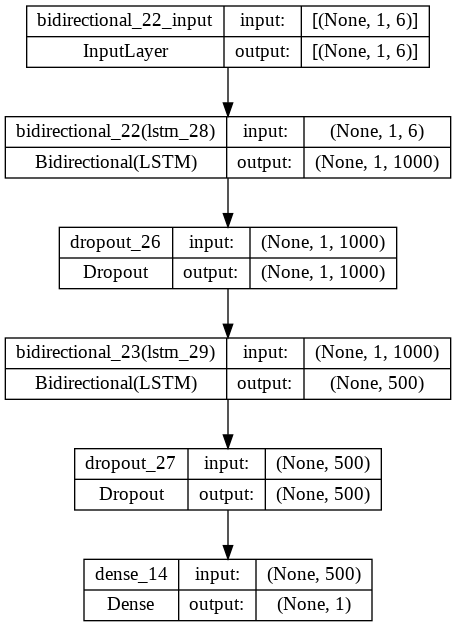

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True,to_file='model.png')

In [ ]:
#  Fitting Network
history = model.fit(X_train, y_train, epochs = 100,
                    batch_size = 70,
                    #validation_split=0.2,
                    validation_data = (X_test, y_test),
                    verbose = 2,
                    shuffle = True)

Epoch 1/100
376/376 - 11s - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0082 - val_mse: 0.0082 - 11s/epoch - 28ms/step
Epoch 2/100
376/376 - 3s - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0074 - val_mse: 0.0074 - 3s/epoch - 8ms/step
Epoch 3/100
376/376 - 3s - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0073 - val_mse: 0.0073 - 3s/epoch - 8ms/step
Epoch 4/100
376/376 - 3s - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0077 - val_mse: 0.0077 - 3s/epoch - 8ms/step
Epoch 5/100
376/376 - 3s - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0076 - val_mse: 0.0076 - 3s/epoch - 9ms/step
Epoch 6/100
376/376 - 3s - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0075 - val_mse: 0.0075 - 3s/epoch - 8ms/step
Epoch 7/100
376/376 - 3s - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0074 - val_mse: 0.0074 - 3s/epoch - 8ms/step
Epoch 8/100
376/376 - 3s - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0080 - val_mse: 0.0080 - 3s/epoch - 8ms/step
Epoch 9/100
376/376 - 3s - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0074 - val_mse: 0.0074 - 

In [ ]:
model.save("/content/drive/MyDrive/sundus/electric_power_consumption_blstm.h5")

In [ ]:
model.load_weights("/content/drive/MyDrive/sundus/electric_power_consumption.h5")

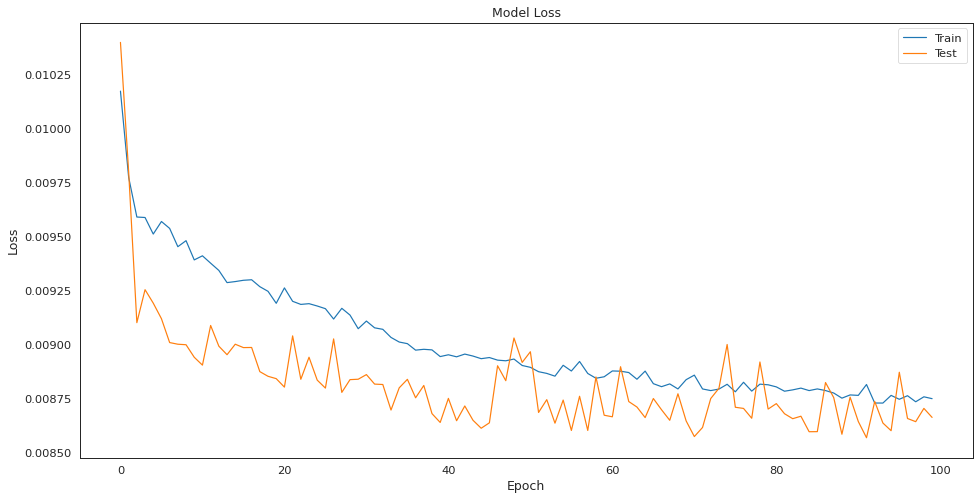

In [ ]:
#  Summarizing History For Loss
plt.figure(figsize = (16, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
#  Making A Prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 6))


#  Inverting Scaling To Forecast
y_pred_i = np.concatenate((y_pred, X_test[:, -5:]), axis=1)
y_pred_i = scaler.inverse_transform(y_pred_i)
y_pred_i = y_pred_i[:,0]


#  Inverting Scaling For Actual
y_test = y_test.reshape((len(y_test), 1))
y_i = np.concatenate((y_test, X_test[:, -5:]), axis=1)
y_i = scaler.inverse_transform(y_i)
y_i = y_i[:,0]


#  Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_i, y_pred_i))
print('Test RMSE : %.3f' % rmse)

mse = mean_squared_error(y_pred_i, y_i)
print('Test MSE : %.3f' % mse)

mape = mean_absolute_percentage_error(y_pred_i, y_i)
print('Test MAPE : %.3f' % mape)

mae = mean_absolute_error(y_pred_i, y_i)
print('Test MAE : %.3f' % mae)

260/260 [==============================] - 3s 3ms/step
Test RMSE : 0.541
Test MSE : 0.293
Test MAPE : 0.391
Test MAE : 0.397


In [ ]:
#  Making A Prediction on Training Data
y_pred_train = model.predict(X_train)
X_train = X_train.reshape((X_train.shape[0], 6))

#  Inverting Scaling To Forecast
y_pred_i_train = np.concatenate((y_pred_train, X_train[:, -5:]), axis=1)
y_pred_i_train = scaler.inverse_transform(y_pred_i_train)
y_pred_i_train = y_pred_i_train[:,0]

#  Inverting Scaling For Actual
y_train = y_train.reshape((len(y_train), 1))
y_i_train = np.concatenate((y_train, X_train[:, -5:]), axis=1)
y_i_train = scaler.inverse_transform(y_i_train)
y_i_train = y_i_train[:,0]

#  Calculating Metrics
rmse = np.sqrt(mean_squared_error(y_i_train, y_pred_i_train))
print('Train RMSE : %.3f' % rmse)

mse = mean_squared_error(y_pred_i_train, y_i_train)
print('Train MSE : %.3f' % mse)

mape = mean_absolute_percentage_error(y_pred_i_train, y_i_train)
print('Train MAPE : %.3f' % mape)

mae = mean_absolute_error(y_pred_i_train, y_i_train)
print('Train MAE : %.3f' % mae)

822/822 [==============================] - 3s 3ms/step
Train RMSE : 0.597
Train MSE : 0.356
Train MAPE : 0.432
Train MAE : 0.424


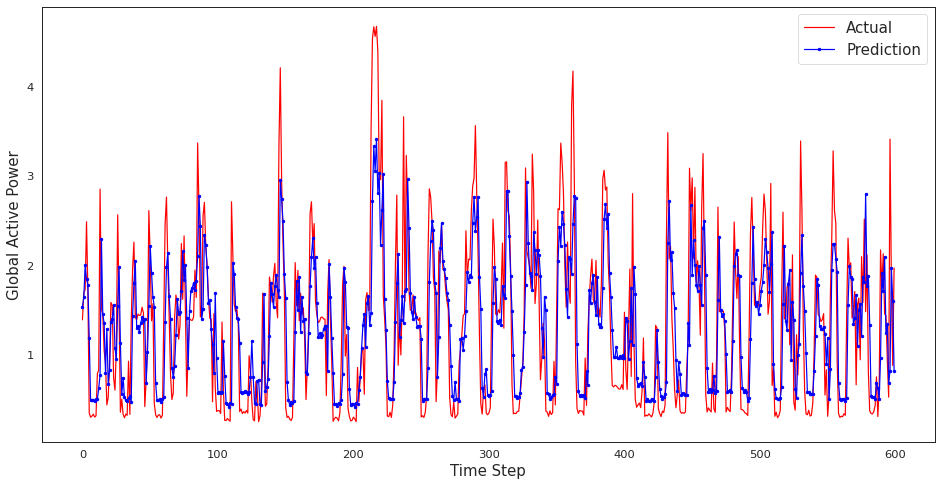

In [ ]:
#  Every Time Step is One Hour
#  Compairing The Predictions In 600 Hours

pq = [x for x in range(600)]
plt.figure(figsize = (16, 8))
plt.plot(pq, y_i[:600], 'r', label="Actual")
plt.plot(pq, y_pred_i[:600], marker='.', color='b', label="Prediction")
plt.ylabel('Global Active Power', size=15)
plt.xlabel('Time Step', size=15)
plt.legend(fontsize=15)
plt.show()

## Monthly Data

In [ ]:
#  Resampling of Data Over Month
over_month = power.resample('M').mean()
over_month.shape

(48, 6)

In [ ]:
over_month.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-31,1.901148,0.131384,8.029338,1.248613,2.214821,7.409385
2007-01-31,1.546014,0.132676,6.546829,1.264230,1.775909,7.383309
2007-02-28,1.401068,0.113637,5.914505,1.180214,1.602346,6.703545
2007-03-31,1.318622,0.114747,5.572958,1.361338,2.346848,6.504647
2007-04-30,0.908462,0.119203,3.894800,1.070716,1.001190,4.943236


In [ ]:
# Training Based On The Resampled Data (Over Month)
results_month = over_month.values

In [ ]:
results_month.shape

(48, 6)

In [ ]:
#  Normalizing Features
scaler = MinMaxScaler(feature_range=(0, 1))
s = scaler.fit_transform(results_month)
s.shape

(48, 6)

In [ ]:
#  Framing As Supervised Learning
r = data_prep(s, 1, 1)
#  Dropping Columns which are not predicted
r.drop(r.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(r.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   1.000000   0.442324   1.000000   0.721703   0.928558   0.667469  0.781405
2   0.781405   0.455242   0.780876   0.731404   0.691058   0.664375  0.692187
3   0.692187   0.264796   0.687415   0.679214   0.597141   0.583706  0.641439
4   0.641439   0.275897   0.636932   0.791727   1.000000   0.560102  0.388975
5   0.388975   0.320475   0.388890   0.611194   0.271847   0.374806  0.436616


In [ ]:
#  Splitting Into Train & Test Sets
results_month = r.values

In [ ]:
test = results_month

# train = results_month[:12, :]
# test = results_month[12:, :]

In [ ]:
X_test, y_test = test[:, :-1], test[:, -1]

# #  Splitting Into Input & Outputs
# X_train, y_train = train[:, :-1], train[:, -1]
# X_test, y_test = test[:, :-1], test[:, -1]

In [ ]:
# Rehaping The Input Into The 3D Format As Expected By LSTMs, Namely [samples, timesteps, features].
#  Reshaping Input To Be 3D [samples, timesteps, features]
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_test.shape, y_test.shape)

(47, 1, 6) (47,)


In [ ]:
print ('X_test Shape : ',X_test.shape)
print ('y_test Shape : ',y_test.shape)

X_test Shape :  (47, 1, 6)
y_test Shape :  (47,)


In [ ]:
#  Making A Prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 6))

2/2 [==============================] - 0s 8ms/step


In [ ]:
#  Inverting Scaling To Forecast
y_pred_i = np.concatenate((y_pred, X_test[:, -5:]), axis=1)
y_pred_i = scaler.inverse_transform(y_pred_i)
y_pred_i = y_pred_i[:,0]


#  Inverting Scaling For Actual
y_test = y_test.reshape((len(y_test), 1))
y_i = np.concatenate((y_test, X_test[:, -5:]), axis=1)
y_i = scaler.inverse_transform(y_i)
y_i = y_i[:,0]

In [ ]:
rmse = np.sqrt(mean_squared_error(y_i, y_pred_i))
print('Test RMSE : %.3f' % rmse)

mse = mean_squared_error(y_pred_i, y_i)
print('Test MSE : %.3f' % mse)

mape = mean_absolute_percentage_error(y_pred_i, y_i)
print('Test MAPE : %.3f' % mape)

mae = mean_absolute_error(y_pred_i, y_i)
print('Test MAE : %.3f' % mae)

Test RMSE : 2.113
Test MSE : 4.466
Test MAPE : 4.744
Test MAE : 1.393


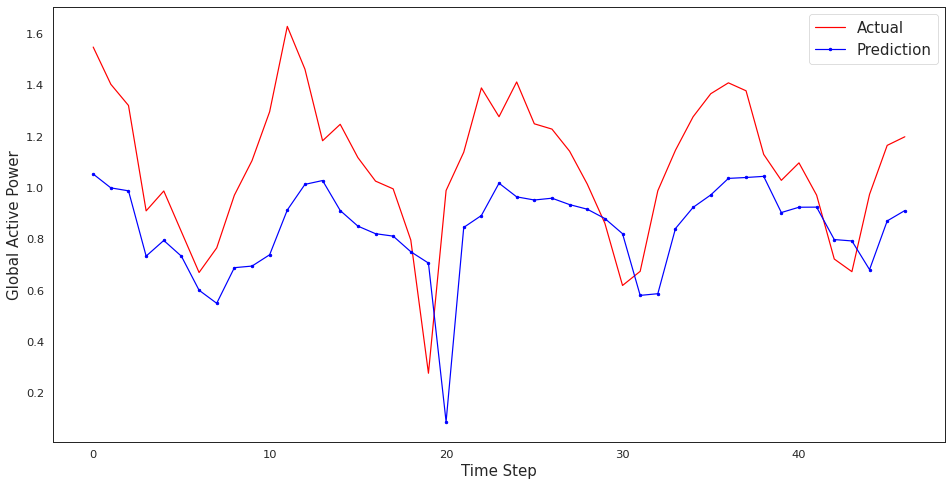

In [ ]:
pq = [x for x in range(47)]
plt.figure(figsize = (16, 8))
plt.plot(pq, y_i[:47], 'r', label="Actual")
plt.plot(pq, y_pred_i[:47], marker='.', color='b', label="Prediction")
plt.ylabel('Global Active Power', size=15)
plt.xlabel('Time Step', size=15)
plt.legend(fontsize=15)
plt.show()

## Weekly Data

In [ ]:
#  Resampling of Data Over Week
over_weekly = power.resample('W').mean()
over_weekly.shape

(207, 6)

In [ ]:
over_weekly.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-17,2.505248,0.142118,10.664161,1.107298,2.577887,9.949346
2006-12-24,1.734059,0.116708,7.341434,1.110342,2.118412,7.684516
2006-12-31,1.958204,0.144105,8.237327,1.412623,2.245099,6.671619
2007-01-07,1.484233,0.133825,6.262123,0.581052,1.745933,5.376290
2007-01-14,1.604903,0.157779,6.830915,1.331461,1.883958,8.270085


In [ ]:
# Training Based On The Resampled Data (Over Week)
results_weekly = over_weekly.values

In [ ]:
results_weekly.shape

(207, 6)

In [ ]:
#  Normalizing Features
scaler = MinMaxScaler(feature_range=(0, 1))
s = scaler.fit_transform(results_weekly)
s.shape

(207, 6)

In [ ]:
#  Framing As Supervised Learning
r = data_prep(s, 1, 1)
#  Dropping Columns which are not predicted
r.drop(r.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(r.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   1.000000   0.514918   1.000000   0.432083   0.831032   0.800781  0.667770
2   0.667770   0.338605   0.660892   0.433271   0.680447   0.595483  0.764332
3   0.764332   0.528710   0.752325   0.551225   0.721966   0.503668  0.560144
4   0.560144   0.457374   0.550741   0.226734   0.558373   0.386252  0.612129
5   0.612129   0.623589   0.608790   0.519554   0.603609   0.648563  0.627012


In [ ]:
#  Splitting Into Train & Test Sets
results_weekly = r.values

In [ ]:
test = results_weekly

In [ ]:
X_test, y_test = test[:, :-1], test[:, -1]

In [ ]:
# Rehaping The Input Into The 3D Format As Expected By LSTMs, Namely [samples, timesteps, features].
#  Reshaping Input To Be 3D [samples, timesteps, features]
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_test.shape, y_test.shape)

(206, 1, 6) (206,)


In [ ]:
print ('X_test Shape : ',X_test.shape)
print ('y_test Shape : ',y_test.shape)

X_test Shape :  (206, 1, 6)
y_test Shape :  (206,)


In [ ]:
#  Making A Prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 6))

7/7 [==============================] - 5s 5ms/step


In [ ]:
#  Inverting Scaling To Forecast
y_pred_i = np.concatenate((y_pred, X_test[:, -5:]), axis=1)
y_pred_i = scaler.inverse_transform(y_pred_i)
y_pred_i = y_pred_i[:,0]


#  Inverting Scaling For Actual
y_test = y_test.reshape((len(y_test), 1))
y_i = np.concatenate((y_test, X_test[:, -5:]), axis=1)
y_i = scaler.inverse_transform(y_i)
y_i = y_i[:,0]

In [ ]:
rmse = np.sqrt(mean_squared_error(y_i, y_pred_i))
print('Test RMSE : %.3f' % rmse)

mse = mean_squared_error(y_pred_i, y_i)
print('Test MSE : %.3f' % mse)

mape = mean_absolute_percentage_error(y_pred_i, y_i)
print('Test MAPE : %.3f' % mape)

mae = mean_absolute_error(y_pred_i, y_i)
print('Test MAE : %.3f' % mae)

Test RMSE : 0.323
Test MSE : 0.104
Test MAPE : 0.429
Test MAE : 0.265


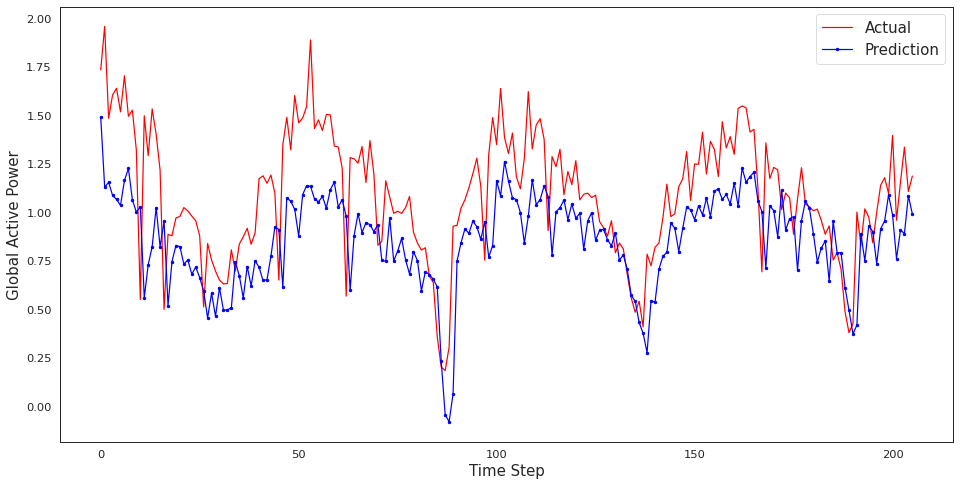

In [ ]:
pq = [x for x in range(206)]
plt.figure(figsize = (16, 8))
plt.plot(pq, y_i[:206], 'r', label="Actual")
plt.plot(pq, y_pred_i[:206], marker='.', color='b', label="Prediction")
plt.ylabel('Global Active Power', size=15)
plt.xlabel('Time Step', size=15)
plt.legend(fontsize=15)
plt.show()

## Daily Data

In [ ]:
#  Resampling of Data Over Day
over_dialy = power.resample('D').mean()
over_dialy.shape

(1442, 6)

In [ ]:
over_dialy.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-16,3.053475,0.088187,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,6.467361,0.000000,1.838889,9.765972


In [ ]:
# Training Based On The Resampled Data (Over Daily)
results_daily = over_dialy.values

In [ ]:
results_daily.shape

(1442, 6)

In [ ]:
#  Normalizing Features
scaler = MinMaxScaler(feature_range=(0, 1))
s = scaler.fit_transform(results_daily)
s.shape

(1442, 6)

In [ ]:
#  Framing As Supervised Learning
r = data_prep(s, 1, 1)
#  Dropping Columns which are not predicted
r.drop(r.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(r.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.916786   0.130732   0.928499   0.000000   0.163965   0.740357  0.694252
2   0.694252   0.426671   0.695226   0.181857   0.345776   0.536762  0.431901
3   0.431901   0.234750   0.424618   0.095088   0.216451   0.566912  0.313037
4   0.313037   0.202322   0.311508   0.075051   0.627798   0.218615  0.436748
5   0.436748   0.232377   0.428075   0.000000   0.218680   0.568916  0.324670


In [ ]:
#  Splitting Into Train & Test Sets
results_daily = r.values

In [ ]:
test = results_daily

In [ ]:
X_test, y_test = test[:, :-1], test[:, -1]

In [ ]:
# Rehaping The Input Into The 3D Format As Expected By LSTMs, Namely [samples, timesteps, features].
#  Reshaping Input To Be 3D [samples, timesteps, features]
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_test.shape, y_test.shape)

(1441, 1, 6) (1441,)


In [ ]:
print ('X_test Shape : ',X_test.shape)
print ('y_test Shape : ',y_test.shape)

X_test Shape :  (1441, 1, 6)
y_test Shape :  (1441,)


In [ ]:
#  Making A Prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 6))

46/46 [==============================] - 0s 3ms/step


In [ ]:
#  Inverting Scaling To Forecast
y_pred_i = np.concatenate((y_pred, X_test[:, -5:]), axis=1)
y_pred_i = scaler.inverse_transform(y_pred_i)
y_pred_i = y_pred_i[:,0]


#  Inverting Scaling For Actual
y_test = y_test.reshape((len(y_test), 1))
y_i = np.concatenate((y_test, X_test[:, -5:]), axis=1)
y_i = scaler.inverse_transform(y_i)
y_i = y_i[:,0]

In [ ]:
rmse = np.sqrt(mean_squared_error(y_i, y_pred_i))
print('Test RMSE : %.3f' % rmse)

mse = mean_squared_error(y_pred_i, y_i)
print('Test MSE : %.3f' % mse)

mape = mean_absolute_percentage_error(y_pred_i, y_i)
print('Test MAPE : %.3f' % mape)

mae = mean_absolute_error(y_pred_i, y_i)
print('Test MAE : %.3f' % mae)

Test RMSE : 0.338
Test MSE : 0.115
Test MAPE : 0.322
Test MAE : 0.248


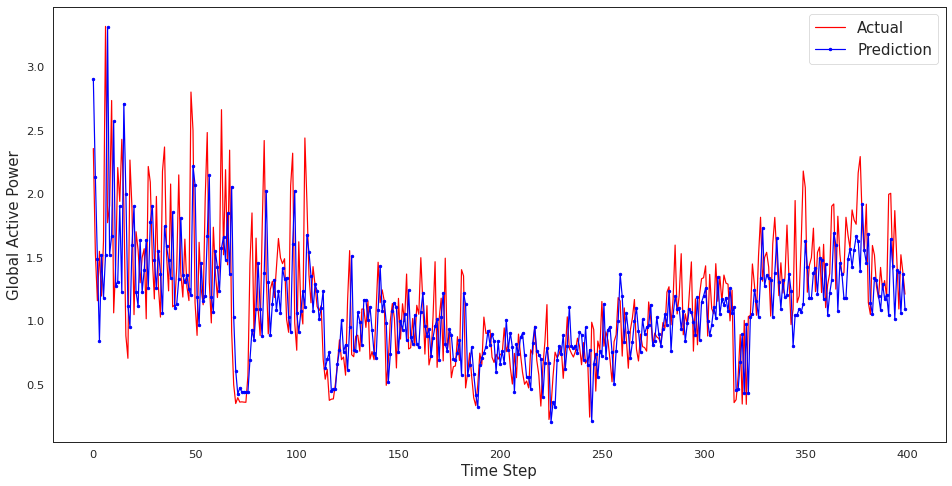

In [ ]:
pq = [x for x in range(400)]
plt.figure(figsize = (16, 8))
plt.plot(pq, y_i[:400], 'r', label="Actual")
plt.plot(pq, y_pred_i[:400], marker='.', color='b', label="Prediction")
plt.ylabel('Global Active Power', size=15)
plt.xlabel('Time Step', size=15)
plt.legend(fontsize=15)
plt.show()